In [11]:
import pandas as pd
import numpy as np
from scipy import stats

file_path = "nepal-earthquake-severity-index-latest.csv"
data = pd.read_csv(file_path)

# Identify numerical columns dynamically
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()

summary_stats = {
    "Measure": ["Mean", "Median", "Mode"],
}
for column in numerical_columns:
    clean_col = data[column].dropna()
    summary_stats[column] = [
        np.mean(clean_col),
        np.median(clean_col),
        stats.mode(clean_col, keepdims=True).mode[0] if not clean_col.empty else "N/A"
    ]
# Converting to DataFrame
summary_stats_df = pd.DataFrame(summary_stats)

print("\n===== Mean, Median, and Mode of Numerical Columns =====\n")
print(summary_stats_df)





===== Mean, Median, and Mode of Numerical Columns =====

  Measure  Hazard (Intensity)  Exposure   Housing   Poverty  Vulnerability  \
0    Mean            0.320537  0.067493  5.706522  5.481854       5.594635   
1  Median            0.010000  0.050000  5.610000  5.620000       5.550000   
2    Mode            0.000000  0.040000  5.000000  3.310000       5.040000   

   Severity  Severity Normalized  
0   0.24872             0.510221  
1   0.14000             0.286200  
2   0.00000             0.000000  


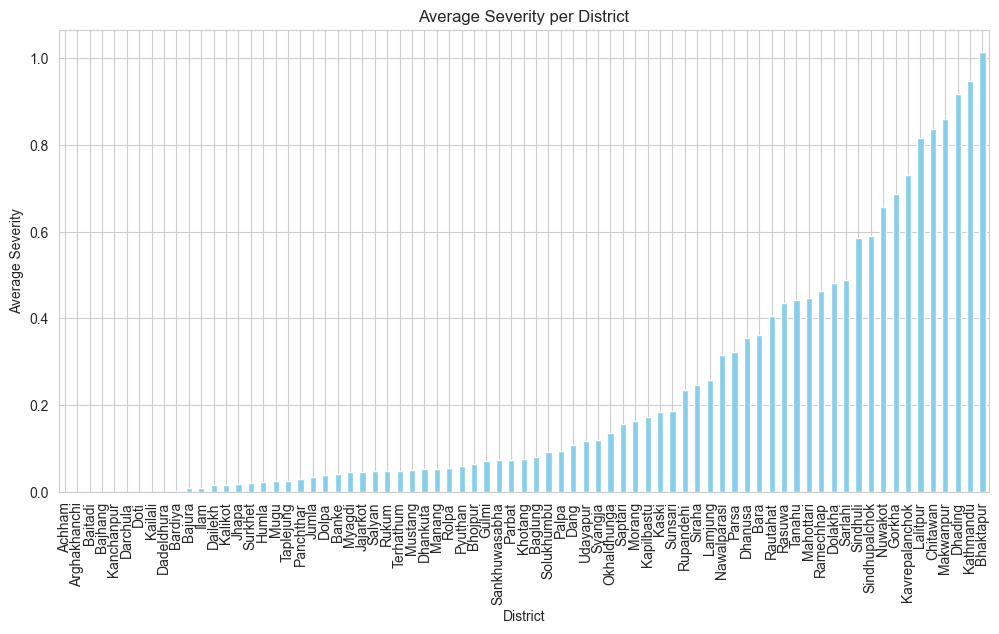

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
sns.set_style("whitegrid")

# Bar Chart: Average Severity per District
plt.figure(figsize=(12, 6))
avg_severity = data.groupby("DISTRICT")["Severity"].mean().sort_values()
avg_severity.plot(kind="bar", color="skyblue")
plt.title("Average Severity per District")
plt.xlabel("District")
plt.ylabel("Average Severity")
plt.xticks(rotation=90)
plt.show()

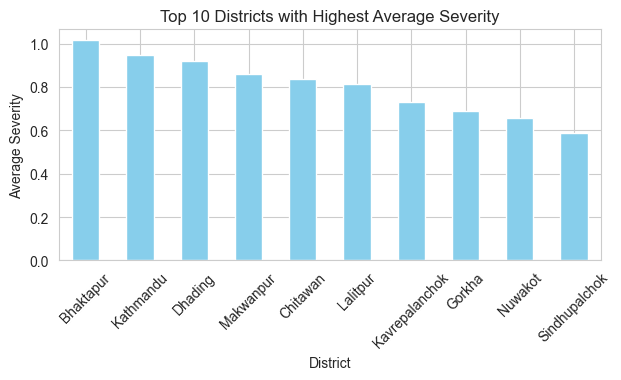

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "nepal-earthquake-severity-index-latest.csv"  # Update with correct path if needed
data = pd.read_csv(file_path)

# # Display the first few rows to confirm successful import
# print("Dataset Imported Successfully! First 5 rows:\n")
# print(data.head())

# Set style for better visualization
# sns.set_style("whitegrid")

# Bar Chart: Top 10 Districts with Highest Average Severity
plt.figure(figsize=(7, 3))
top_10_severity = data.groupby("DISTRICT")["Severity"].mean().sort_values(ascending=False).head(10)
top_10_severity.plot(kind="bar", color="skyblue")
plt.title("Top 10 Districts with Highest Average Severity")
plt.xlabel("District")
plt.ylabel("Average Severity")
plt.xticks(rotation=45)
plt.show()



In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "nepal-earthquake-severity-index-latest.csv"  # Update the path if necessary
data = pd.read_csv(file_path)
print("\n===== Data Before Preprocessing (First 5 Rows) =====\n")
# Display the first few rows to verify import
print("Dataset Imported Successfully! First 5 rows:\n", data.head())

# Identify numerical columns dynamically
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Step 1: Handling Missing Values (Replacing with Mean)
for col in numerical_columns:
    data[col] = data[col].fillna(data[col].mean())  # Fill NaN with column mean

# Step 2: Discretization (Convert "Severity" into 3 categories: Low, Medium, High)
severity_min, severity_max = data["Severity"].min(), data["Severity"].max()
bins = np.linspace(severity_min, severity_max, 4)  # Create 3 bins (Low, Medium, High)
labels = ["Low", "Medium", "High"]
data["Severity_Category"] = pd.cut(data["Severity"], bins=bins, labels=labels, include_lowest=True)

# Step 3: Sampling - Take a random sample of 10% of the data
sampled_data = data.sample(frac=0.1, random_state=42)

# Step 4: Removing Duplicates
initial_rows = data.shape[0]
data = data.drop_duplicates()
removed_duplicates = initial_rows - data.shape[0]
print(f"Removed {removed_duplicates} duplicate rows.")

# Step 5: Outlier Detection and Removal (Using IQR Method)
Q1 = data["Severity"].quantile(0.25)
Q3 = data["Severity"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
outliers_removed = data[~((data["Severity"] < lower_bound) | (data["Severity"] > upper_bound))]
print(f"Outliers removed: {data.shape[0] - outliers_removed.shape[0]}")
data = outliers_removed

# Step 6: Noise Handling (Smoothing using Rolling Mean)
data["Severity_Smoothed"] = data["Severity"].rolling(window=5, min_periods=1).mean()

# Display processed dataset
print("\n===== Preprocessed Dataset (First 5 Rows) =====\n", data.head())

# Optional: Save the processed data
data.to_csv("preprocessed_earthquake_data.csv", index=False)

# # Visualization: Histogram of Severity Before and After Processing
# plt.figure(figsize=(10, 5))
# plt.hist(data["Severity"], bins=30, alpha=0.5, label="Original Severity", color="blue")
# plt.hist(data["Severity_Smoothed"], bins=30, alpha=0.5, label="Smoothed Severity", color="red")
# plt.legend()
# plt.xlabel("Severity")
# plt.ylabel("Frequency")
# plt.title("Comparison: Original vs. Smoothed Severity")
# plt.show()



===== Data Before Preprocessing (First 5 Rows) =====

Dataset Imported Successfully! First 5 rows:
          P_CODE            VDC_NAME   DISTRICT   REGION  Hazard (Intensity)  \
0  C-BAG-27-031       KathmanduN.P.  Kathmandu  Central                2.17   
1  C-BAG-25-027        LalitpurN.P.   Lalitpur  Central                1.72   
2  C-NAR-35-005      BharatpurN. P.   Chitawan  Central                2.21   
3  C-BAG-26-012  MadhyapurThimiN.P.  Bhaktapur  Central                2.45   
4  C-BAG-27-028             Jorpati  Kathmandu  Central                1.91   

   Exposure  Housing  Poverty  Vulnerability  Severity  Severity Normalized  \
0     10.00     8.86     1.82           5.34      4.88              10.0000   
1      2.26     8.40     0.82           4.61      2.62               5.3707   
2      1.47     5.38     2.53           3.96      2.34               4.8083   
3      0.85     8.23     0.89           4.56      2.12               4.3447   
4      0.87     8.86     1.82


===== One-Hot Encoded Transactions (Sampled) =====
    Achham  Arghakhanchi  Baglung  Baitadi  Bajhang  Bajura  Banke   Bara  \
0   False         False    False    False    False   False  False  False   
1   False         False    False    False    False   False  False  False   
2   False         False    False    False    False   False  False  False   
3   False         False    False    False    False   False  False  False   
4   False         False    False    False    False   False  False  False   

   Bardiya  Bhaktapur  ...  Siraha  Solukhumbu  Sunsari  Surkhet  Syangja  \
0    False      False  ...   False       False    False    False    False   
1    False      False  ...   False       False    False    False    False   
2    False      False  ...   False       False    False    False    False   
3    False      False  ...   False       False    False     True    False   
4    False      False  ...   False       False    False    False    False   

   Tanahu  Taplejung  Terha

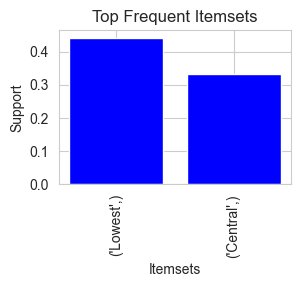

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import defaultdict

# Load the dataset
file_path = "nepal-earthquake-severity-index-latest.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Select relevant categorical columns for transactions
categorical_columns = ["REGION", "DISTRICT", "Severity category"]
sampled_data = data[categorical_columns].dropna().sample(frac=0.1, random_state=42).astype(str)

# Convert dataset into a transaction format
transactions = sampled_data.values.tolist()

# Step 1: One-hot encode the dataset
unique_items = sorted(set(item for transaction in transactions for item in transaction))
one_hot_encoded = pd.DataFrame([[item in transaction for item in unique_items] for transaction in transactions],
                                columns=unique_items)

# Step 2: Calculate support for itemsets (Limiting size to 1 and 2)
min_support_threshold = 0.3 * len(transactions)  # 30% of transactions
frequent_itemsets = []

# Generate frequent itemsets
for size in range(1, 3):  # Limiting itemset sizes to 1 and 2
    for itemset in combinations(unique_items, size):
        itemset_support = one_hot_encoded[list(itemset)].all(axis=1).mean()
        if itemset_support >= min_support_threshold / len(transactions):  # Apply threshold
            frequent_itemsets.append({"support": itemset_support, "itemsets": itemset})

# Convert results to DataFrame
frequent_itemsets_df = pd.DataFrame(frequent_itemsets).sort_values(by="support", ascending=False)

# Display the results
print("\n===== One-Hot Encoded Transactions (Sampled) =====\n", one_hot_encoded.head())
print("\n===== Frequent Itemsets with Support =====\n", frequent_itemsets_df)

# Visualization: Top Frequent Items
plt.figure(figsize=(3,2))
top_frequent_items = frequent_itemsets_df.nlargest(5, "support")
plt.bar(top_frequent_items["itemsets"].astype(str), top_frequent_items["support"], color="blue")
plt.xticks(rotation=90)
plt.xlabel("Itemsets")
plt.ylabel("Support")
plt.title("Top Frequent Itemsets")
plt.show()


In [36]:
import numpy as np
import pandas as pd
from itertools import combinations
from collections import Counter

# Load the dataset
file_path = "nepal-earthquake-severity-index-latest.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Select relevant categorical columns for transactions
categorical_columns = ["REGION", "DISTRICT", "Severity category"]
sampled_data = data[categorical_columns].dropna().sample(frac=0.1, random_state=42).astype(str)

# Convert dataset into a transaction format
transactions = sampled_data.values.tolist()

# Step 1: Count individual item frequency in transactions
item_counts = Counter(item for transaction in transactions for item in transaction)

# Step 2: Filter frequent items (support threshold: 20% of transactions)
min_support_threshold = 0.2 * len(transactions)
frequent_items = {item for item, count in item_counts.items() if count >= min_support_threshold}

# Filter transactions to only include frequent items and sort by frequency
filtered_transactions = [
    sorted([item for item in transaction if item in frequent_items], key=lambda x: item_counts[x], reverse=True)
    for transaction in transactions
]

# Step 3: Generate frequent itemsets
frequent_itemsets = Counter()
for transaction in filtered_transactions:
    for size in range(1, len(transaction) + 1):  # Generate itemsets of size 1 and above
        for itemset in combinations(transaction, size):
            frequent_itemsets[itemset] += 1

# Create a DataFrame for frequent itemsets
frequent_itemsets_df = pd.DataFrame(
    [{"itemsets": itemset, "support": support / len(transactions)} for itemset, support in frequent_itemsets.items()
     if support / len(transactions) >= min_support_threshold / len(transactions)]
).sort_values(by="support", ascending=False)

# Step 4: Generate strong association rules based on confidence (threshold: 40%)
min_confidence_threshold = 0.4
association_rules_list = []
for itemset, support in frequent_itemsets.items():
    if len(itemset) > 1:
        for consequent in combinations(itemset, 1):  # Generate single-item consequents
            antecedent = tuple(sorted(set(itemset) - set(consequent)))
            antecedent_support = frequent_itemsets[antecedent]
            confidence = support / antecedent_support if antecedent_support else 0
            if confidence >= min_confidence_threshold:
                association_rules_list.append({"Rule": f"{antecedent} -> {consequent}", "Confidence": confidence})

# Convert association rules to DataFrame
association_rules_df = pd.DataFrame(association_rules_list)

# Display the results
print("\n===== Frequent Itemsets =====\n", frequent_itemsets_df)
print("\n===== Association Rules =====\n", association_rules_df)



===== Frequent Itemsets =====
      itemsets   support
1   (Lowest,)  0.442211
0  (Central,)  0.334171
3  (Western,)  0.238693
2  (Eastern,)  0.231156

===== Association Rules =====
                           Rule  Confidence
0  ('Eastern',) -> ('Lowest',)    0.608696
1  ('Western',) -> ('Lowest',)    0.452632


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7366220735785953

Classification Report:
               precision    recall  f1-score   support

     Highest       0.00      0.00      0.00        53
        High       0.00      0.00      0.00         7
 Medium-High       0.86      0.41      0.55       234
  Medium-Low       0.80      0.99      0.89       554
         Low       0.49      0.92      0.64       147
      Lowest       0.81      0.50      0.62       201

    accuracy                           0.74      1196
   macro avg       0.49      0.47      0.45      1196
weighted avg       0.74      0.74      0.70      1196



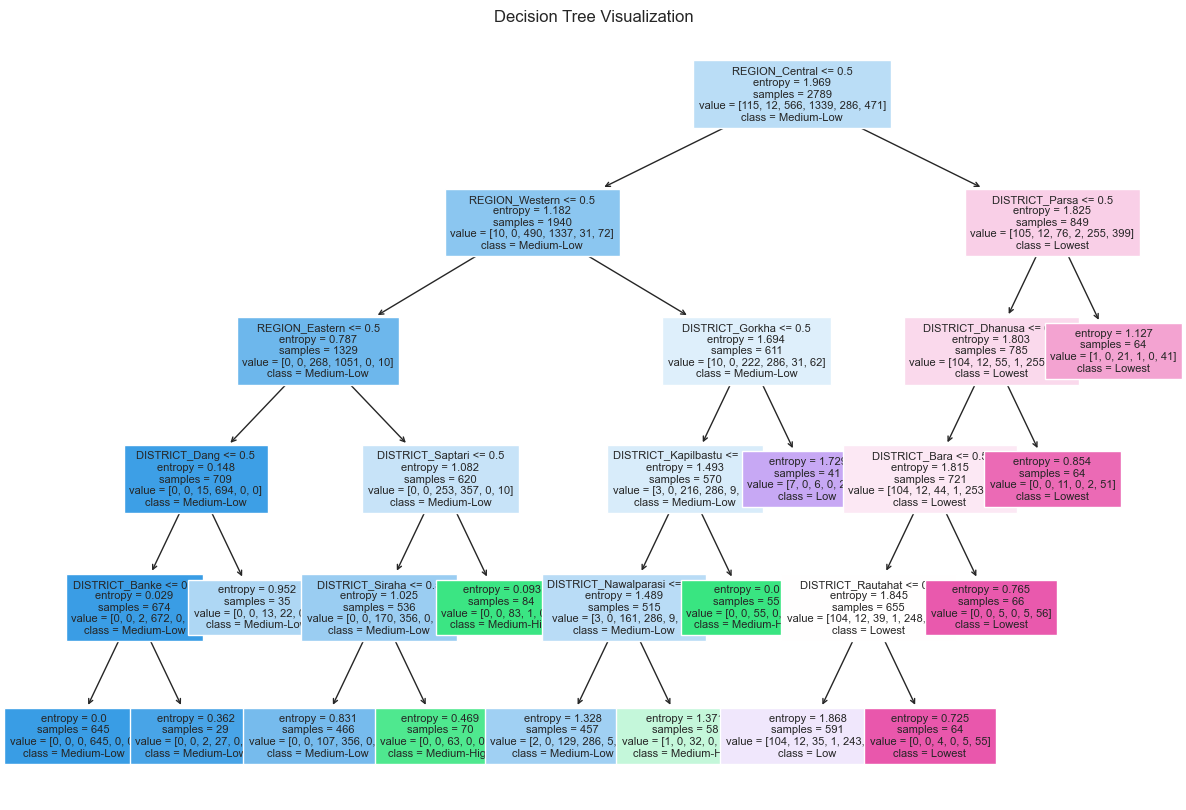

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
file_path = "nepal-earthquake-severity-index-latest.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Select features and target for classification
# Using 'REGION' and 'DISTRICT' as features and 'Severity category' as target
data = data.dropna(subset=["REGION", "DISTRICT", "Severity category"])  # Remove rows with missing target values
X = pd.get_dummies(data[["REGION", "DISTRICT"]])  # One-hot encode categorical features
y = pd.Categorical(data["Severity category"]).codes  # Encode target as numeric
class_labels = data["Severity category"].unique()  # Dynamically extract class labels

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Step 3: Test the model and evaluate its performance
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=class_labels)
print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", report)

# Step 4: Visualize the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=class_labels, filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

# # Display textual representation of the Decision Tree
# tree_rules = export_text(clf, feature_names=list(X.columns))
# print("\nDecision Tree Rules:\n", tree_rules)


In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "nepal-earthquake-severity-index-latest.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Select features and target for classification
# Using 'REGION' and 'DISTRICT' as features and 'Severity category' as target
data = data.dropna(subset=["REGION", "DISTRICT", "Severity category"])  # Remove rows with missing target values
X = pd.get_dummies(data[["REGION", "DISTRICT"]])  # One-hot encode categorical features
y = pd.Categorical(data["Severity category"]).codes  # Encode target as numeric
class_labels = data["Severity category"].unique()  # Dynamically extract class labels

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train a Naïve Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 3: Test the model and evaluate its performance
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=class_labels)

# Display the results
print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", report)


Accuracy: 0.5409698996655519

Classification Report:
               precision    recall  f1-score   support

     Highest       0.13      0.42      0.19        53
        High       0.04      0.57      0.08         7
 Medium-High       0.46      0.50      0.48       234
  Medium-Low       1.00      0.75      0.85       554
         Low       0.29      0.30      0.29       147
      Lowest       0.42      0.23      0.30       201

    accuracy                           0.54      1196
   macro avg       0.39      0.46      0.37      1196
weighted avg       0.66      0.54      0.58      1196



In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "nepal-earthquake-severity-index-latest.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Select features and target for classification
# Using 'REGION' and 'DISTRICT' as features and 'Severity category' as target
data = data.dropna(subset=["REGION", "DISTRICT", "Severity category"])  # Remove rows with missing target values
X = pd.get_dummies(data[["REGION", "DISTRICT"]])  # One-hot encode categorical features
y = pd.Categorical(data["Severity category"]).codes  # Encode target as numeric
class_labels = data["Severity category"].unique()  # Dynamically extract class labels

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Normalize the feature data (Neural Networks perform better with normalized data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train a Multi-layer Perceptron (MLP) Neural Network Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Step 4: Test the model and evaluate its performance
y_pred = mlp_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=class_labels)

# Display the results
print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", report)


Accuracy: 0.8244147157190636

Classification Report:
               precision    recall  f1-score   support

     Highest       0.53      0.32      0.40        53
        High       0.00      0.00      0.00         7
 Medium-High       0.74      0.83      0.79       234
  Medium-Low       0.97      0.96      0.96       554
         Low       0.62      0.68      0.65       147
      Lowest       0.74      0.70      0.72       201

    accuracy                           0.82      1196
   macro avg       0.60      0.58      0.59      1196
weighted avg       0.82      0.82      0.82      1196



C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "nepal-earthquake-severity-index-latest.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Select features and target for classification
# Using 'REGION' and 'DISTRICT' as features and 'Severity category' as target
data = data.dropna(subset=["REGION", "DISTRICT", "Severity category"])  # Remove rows with missing target values
X = pd.get_dummies(data[["REGION", "DISTRICT"]])  # One-hot encode categorical features
y = pd.Categorical(data["Severity category"]).codes  # Encode target as numeric
class_labels = data["Severity category"].unique()  # Dynamically extract class labels

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train an SVM model
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

# Step 3: Test the model and evaluate its performance
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=class_labels)

# Display the results
print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", report)

Accuracy: 0.8269230769230769

Classification Report:
               precision    recall  f1-score   support

     Highest       0.53      0.45      0.49        53
        High       0.00      0.00      0.00         7
 Medium-High       0.74      0.83      0.79       234
  Medium-Low       0.97      0.96      0.96       554
         Low       0.65      0.65      0.65       147
      Lowest       0.74      0.70      0.72       201

    accuracy                           0.83      1196
   macro avg       0.61      0.60      0.60      1196
weighted avg       0.82      0.83      0.82      1196



C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Squared Error (MSE): 0.03211194657042947
R² Score: 0.6963239074964372


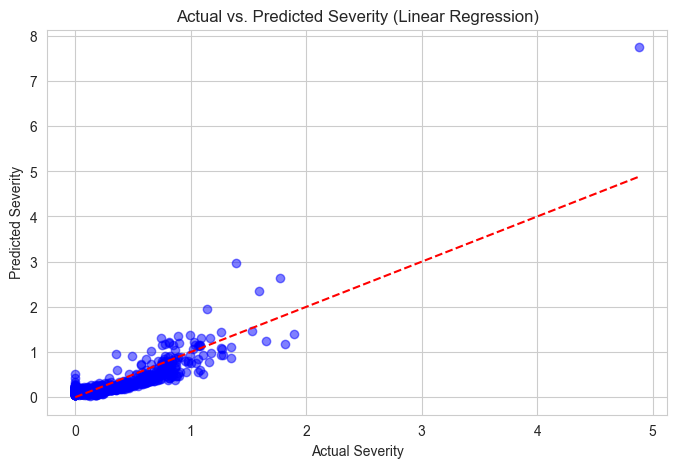

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "nepal-earthquake-severity-index-latest.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Select features and target for regression
# Using 'Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability' as features
# Predicting 'Severity' as the target variable
features = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability']
target = 'Severity'

# Drop rows with missing values
data = data.dropna(subset=features + [target])

X = data[features]  # Features
y = data[target]  # Target variable

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train a Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Step 3: Test the model and evaluate its performance
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Step 4: Visualization - Actual vs. Predicted Severity
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="dashed")
plt.xlabel("Actual Severity")
plt.ylabel("Predicted Severity")
plt.title("Actual vs. Predicted Severity (Linear Regression)")
plt.show()


In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# Load the dataset
file_path = "nepal-earthquake-severity-index-latest.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Select features and target for classification
# Using 'REGION' and 'DISTRICT' as features and 'Severity category' as target
data = data.dropna(subset=["REGION", "DISTRICT", "Severity category"])  # Remove rows with missing target values
X = pd.get_dummies(data[["REGION", "DISTRICT"]])  # One-hot encode categorical features
y = pd.Categorical(data["Severity category"]).codes  # Encode target as numeric

# Step 1: Define the K-Fold Cross Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Step 2: Train and Evaluate Model using Cross Validation
model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X, y, cv=kf, scoring="accuracy")

# Step 3: Display Results
print(f"Accuracy of each fold: {scores}")
print(f"Average Accuracy: {scores.mean()}")


Accuracy of each fold: [0.81179423 0.84441656 0.83312422 0.80677541 0.80928482]
Average Accuracy: 0.8210790464240902


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia (Sum of Squared Distances): 11370.816839328287


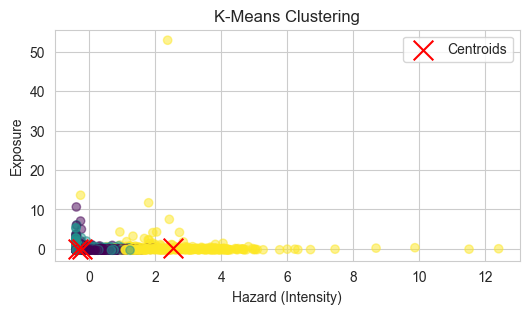

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "nepal-earthquake-severity-index-latest.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Select numerical features for clustering
features = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability']
data = data.dropna(subset=features)  # Remove rows with missing values
X = data[features]  # Feature selection

# Step 1: Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply K-Means Clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
data["Cluster"] = kmeans.fit_predict(X_scaled)

# Step 3: Evaluate the clusters (Inertia: sum of squared distances to cluster centers)
print(f"Inertia (Sum of Squared Distances): {kmeans.inertia_}")

# Step 4: Visualize the clusters (First two principal components)
plt.figure(figsize=(6, 3))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data["Cluster"], cmap="viridis", alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="red", marker="x", s=200, label="Centroids")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("K-Means Clustering")
plt.legend()
plt.show()


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia (Sum of Squared Distances): 11946.717494595234


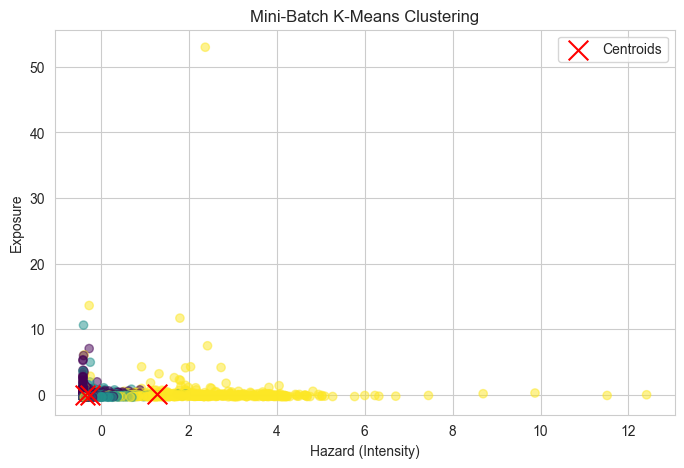

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "nepal-earthquake-severity-index-latest.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Select numerical features for clustering
features = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability']
data = data.dropna(subset=features)  # Remove rows with missing values
X = data[features]  # Feature selection

# Step 1: Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply Mini-Batch K-Means Clustering
k = 3  # Number of clusters
mini_kmeans = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)
data["Cluster"] = mini_kmeans.fit_predict(X_scaled)

# Step 3: Evaluate the clusters (Inertia: sum of squared distances to cluster centers)
print(f"Inertia (Sum of Squared Distances): {mini_kmeans.inertia_}")

# Step 4: Visualize the clusters (First two principal components)
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data["Cluster"], cmap="viridis", alpha=0.5)
plt.scatter(mini_kmeans.cluster_centers_[:, 0], mini_kmeans.cluster_centers_[:, 1], color="red", marker="x", s=200, label="Centroids")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Mini-Batch K-Means Clustering")
plt.legend()
plt.show()


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


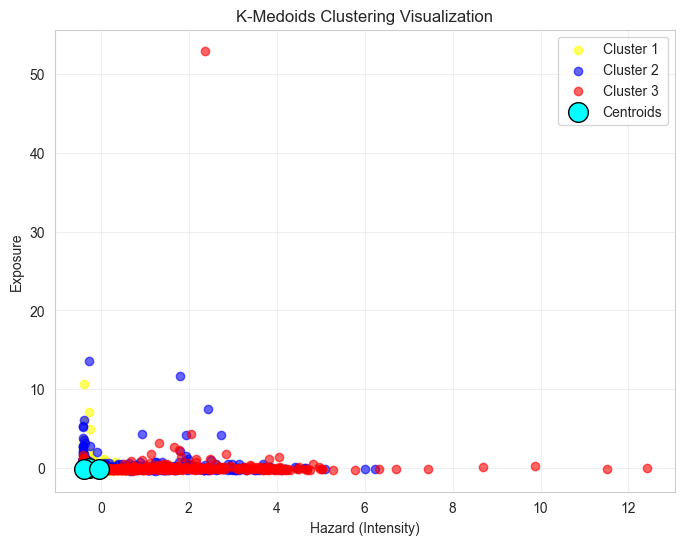

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "nepal-earthquake-severity-index-latest.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Select numerical features for clustering
features = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability']
data = data.dropna(subset=features)  # Remove rows with missing values
X = data[features]  # Feature selection

# Step 1: Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply K-Medoids Clustering
k = 3  # Number of clusters
kmedoids = KMedoids(n_clusters=k, random_state=42)
data["Cluster"] = kmedoids.fit_predict(X_scaled)

# Extract cluster centroids
centroids = kmedoids.cluster_centers_

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
colors = ['yellow', 'blue', 'red']
for cluster_id in range(k):
    cluster_points = X_scaled[data["Cluster"] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                c=colors[cluster_id], alpha=0.6, label=f'Cluster {cluster_id + 1}')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='cyan', marker='o', edgecolor='black', s=200, label='Centroids')

# Formatting the plot
plt.title("K-Medoids Clustering Visualization")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.grid(alpha=0.3)
plt.show()



C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


Inertia (Sum of Squared Distances): 5077.455139854568


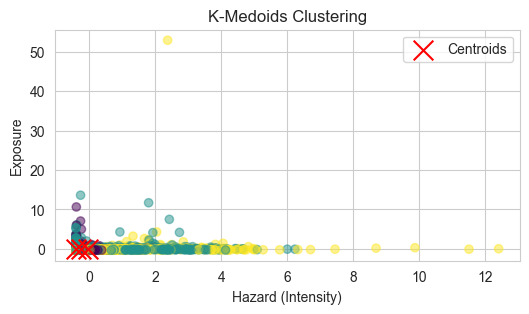

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "nepal-earthquake-severity-index-latest.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Select numerical features for clustering
features = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability']
data = data.dropna(subset=features)  # Remove rows with missing values
X = data[features]  # Feature selection

# Step 1: Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply K-Medoids Clustering
k = 3  # Number of clusters
kmedoids = KMedoids(n_clusters=k, random_state=42)
data["Cluster"] = kmedoids.fit_predict(X_scaled)

# Step 3: Evaluate the clusters
print(f"Inertia (Sum of Squared Distances): {kmedoids.inertia_}")

# Step 4: Visualize the clusters (First two principal components)
plt.figure(figsize=(6, 3))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data["Cluster"], cmap="viridis", alpha=0.5)
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], color="red", marker="x", s=200, label="Centroids")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("K-Medoids Clustering")
plt.legend()
plt.show()


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


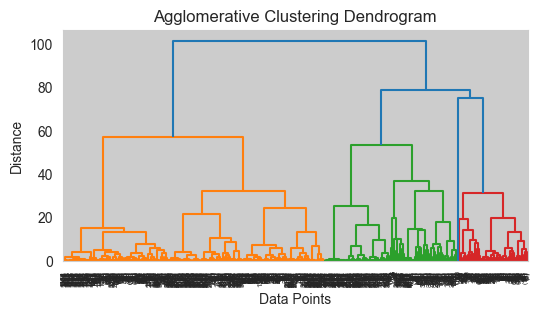

Cluster
0           411
1          1812
2          1762
dtype: int64


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "nepal-earthquake-severity-index-latest.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Select numerical features for clustering
features = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability']
data = data.dropna(subset=features)  # Remove rows with missing values
X = data[features]  # Feature selection

# Step 1: Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply Agglomerative Clustering
k = 3  # Number of clusters
agglo = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
data["Cluster"] = agglo.fit_predict(X_scaled)

# Step 3: Visualize the Dendrogram
plt.figure(figsize=(6, 3))
Z = linkage(X_scaled, method='ward')
dendrogram(Z, truncate_mode="level", p=10)  # Display only first 10 levels for clarity
plt.title("Agglomerative Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Step 4: Display cluster assignment
print(data[["Cluster"]].value_counts().sort_index())


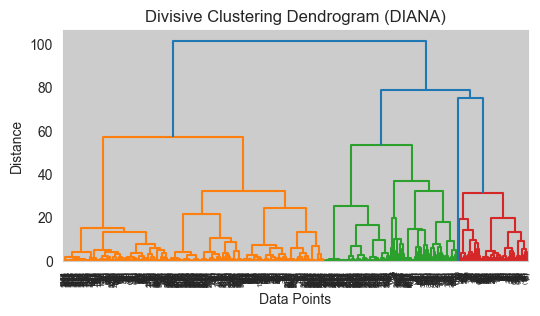

Cluster
1          1812
2          1762
3           411
dtype: int64


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "nepal-earthquake-severity-index-latest.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Select numerical features for clustering
features = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability']
data = data.dropna(subset=features)  # Remove rows with missing values
X = data[features]  # Feature selection

# Step 1: Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply Divisive Clustering (DIANA) using hierarchical clustering
Z = linkage(X_scaled, method='ward')  # Using 'ward' linkage for divisive clustering simulation

# Step 3: Visualize the Dendrogram
plt.figure(figsize=(6, 3))
dendrogram(Z, truncate_mode="level", p=10)  # Display only first 10 levels for clarity
plt.title("Divisive Clustering Dendrogram (DIANA)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Step 4: Assign clusters from the dendrogram
k = 3  # Number of clusters
data["Cluster"] = fcluster(Z, k, criterion='maxclust')

# Display cluster assignments
print(data[["Cluster"]].value_counts().sort_index())


Estimated number of clusters: 25
Number of noise points: 94


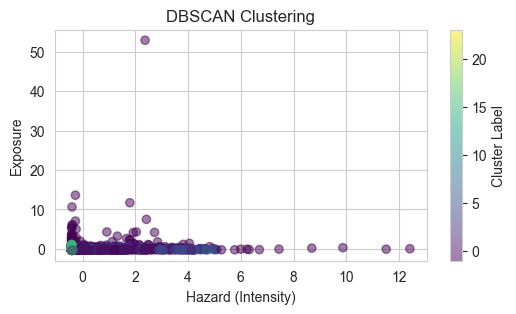

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "nepal-earthquake-severity-index-latest.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Select numerical features for clustering
features = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability']
data = data.dropna(subset=features)  # Remove rows with missing values
X = data[features]  # Feature selection

# Step 1: Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
data["Cluster"] = dbscan.fit_predict(X_scaled)

# Step 3: Evaluate the clusters
num_clusters = len(set(data["Cluster"])) - (1 if -1 in data["Cluster"] else 0)  # -1 represents noise
num_noise_points = list(data["Cluster"]).count(-1)
print(f"Estimated number of clusters: {num_clusters}")
print(f"Number of noise points: {num_noise_points}")

# Step 4: Visualize the Clusters
plt.figure(figsize=(6, 3))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data["Cluster"], cmap="viridis", alpha=0.5)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("DBSCAN Clustering")
plt.colorbar(label="Cluster Label")
plt.show()
